<a href="https://colab.research.google.com/github/mostafa-sadeghi/amirali_eslami/blob/main/s10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!unzip "/content/drive/MyDrive/Fashion/archive.zip" -d "/content/drive/MyDrive/Fashion"

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

fashion_train_df = pd.read_csv('/content/drive/MyDrive/Fashion/fashion-mnist_train.csv', sep=",")

In [ ]:
fashion_train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
fashion_test_df = pd.read_csv('/content/drive/MyDrive/Fashion/fashion-mnist_test.csv', sep=",")

training = np.array(fashion_train_df, dtype="float32")
testing = np.array(fashion_test_df, dtype="float32")

training

array([[2., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       ...,
       [8., 0., 0., ..., 0., 0., 0.],
       [8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]], dtype=float32)

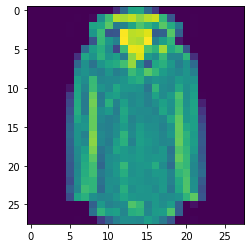

In [ ]:
plt.imshow(training[22,1:].reshape(28,28));

In [ ]:
label = training[22,0]
label

4.0

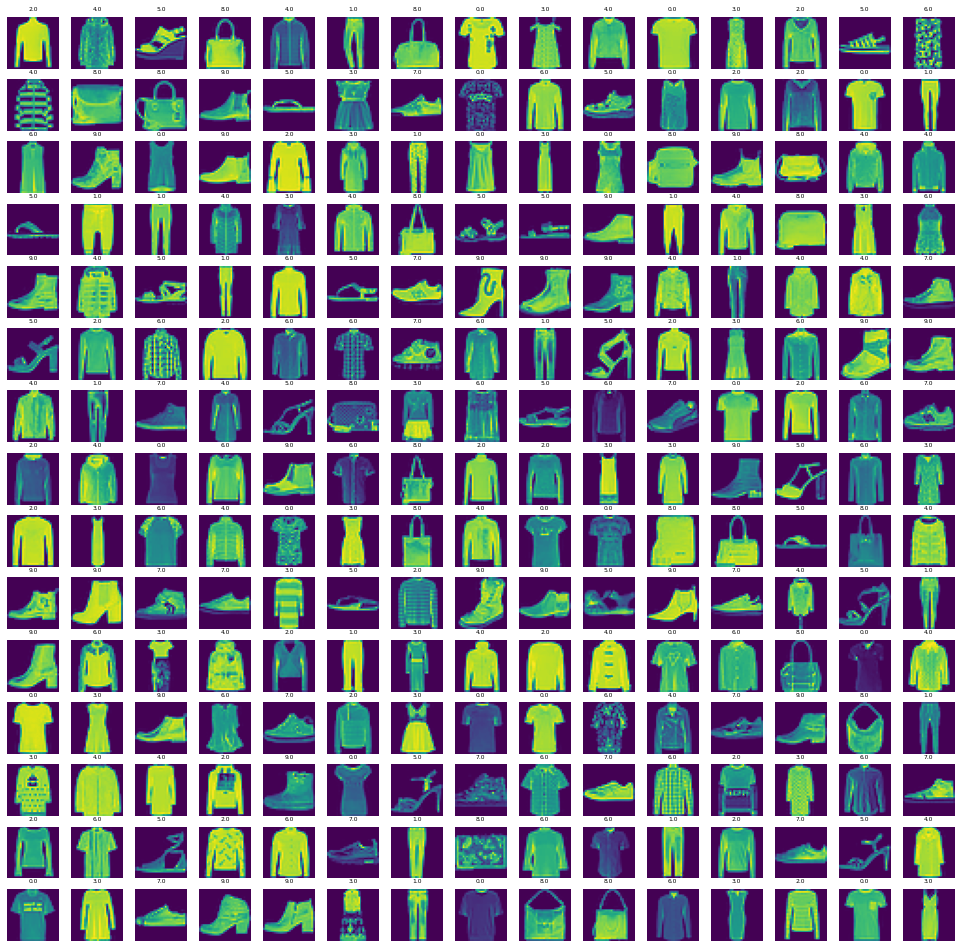

In [ ]:
w_grid = 15
l_grid = 15

fig, axes = plt.subplots(w_grid,l_grid, figsize=(17,17))
axes = axes.ravel()
n_training = len(training)
for i in np.arange(0, w_grid * l_grid):
  index = np.random.randint(0, n_training)
 
  axes[i].imshow(training[index, 1:].reshape(28,28))
  axes[i].set_title(training[index, 0], fontsize=6)
  axes[i].axis('off')

## Training The Model

In [ ]:
X_train = training[:,1:]/255
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
y_train = training[:,0]
y_train
len(y_train)

60000

In [ ]:
X_test = testing[:,1:]/255
y_test = testing[:,0]
len(y_test)

10000

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=12345)

print(len(X_train))
len(X_validate)

48000


12000

In [ ]:
X_train.shape[0]

48000

In [ ]:
X_train = X_train.reshape(X_train.shape[0],*(28,28,1))
X_test = X_test.reshape(X_test.shape[0],*(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0],*(28,28,1))

X_train.shape

(48000, 28, 28, 1)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.optimizers import Adam
import tensorflow as tf

In [ ]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32,3,3, input_shape=(28,28,1), activation="relu"))
cnn_model.add(MaxPooling2D((2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(32,activation="relu"))
cnn_model.add(Dense(10,activation="sigmoid"))

cnn_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = cnn_model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_validate, y_validate))

Epoch 1/10


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5585: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1500/1500 [==============================] - 11s 7ms/step - loss: 0.6543 - accuracy: 0.7657 - val_loss: 0.4796 - val_accuracy: 0.8276
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4576 - accuracy: 0.8330 - val_loss: 0.4409 - val_accuracy: 0.8423
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4181 - accuracy: 0.8469 - val_loss: 0.4190 - val_accuracy: 0.8481
Epoch 4/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.3972 - accuracy: 0.8559 - val_loss: 0.3967 - val_accuracy: 0.8572
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3803 - accuracy: 0.8616 - val_loss: 0.3841 - val_accuracy: 0.8605
Epoch 6/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.3674 - accuracy: 0.8654 - val_loss: 0.3824 - val_accuracy: 0.8581
Epoch 7/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.3579 - accuracy: 0.8688 - val_loss: 0.3906 - val_accuracy: 0.8574

In [ ]:
evaluation = cnn_model.evaluate(X_test,y_test)
print(f"Test accuracy: {evaluation[1]*100:.2f}%")

313/313 [==============================] - 1s 2ms/step - loss: 0.3428 - accuracy: 0.8700
Test accuracy: 87.00%


In [ ]:
predicted_classes = cnn_model.predict(X_test)
len(predicted_classes)

313/313 [==============================] - 1s 2ms/step


10000

In [ ]:
print(predicted_classes[0])
y_test[0]

[9.9968123e-01 1.3786474e-03 4.7599086e-01 7.6117861e-01 5.0738770e-01
 4.0999462e-04 9.9416673e-01 1.0207922e-06 4.1337860e-01 5.7580226e-05]


0.0

In [ ]:
np.argmax(predicted_classes[0])

0

In [ ]:
y_test[0]

0.0

(25,)


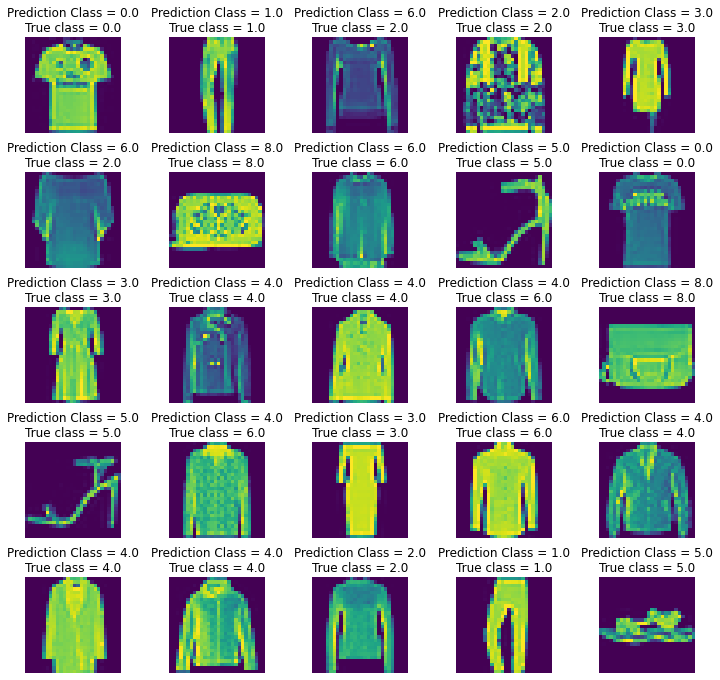

In [ ]:
fig, axes = plt.subplots(5,5,figsize=(12,12))
axes = axes.ravel()
print(axes.shape)
X_test[0].shape
for i in np.arange(0,25):
  axes[i].imshow(X_test[i].reshape(28,28))
  axes[i].set_title(f"Prediction Class = {np.argmax(predicted_classes[i]):.1f}\nTrue class = {y_test[i]}")


  axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)